## Simple ML model

In [2]:
from sklearn.linear_model import LinearRegression
import seaborn as sns
import pandas as pd


mpg = sns.load_dataset('mpg')
data_df = pd.DataFrame(mpg)
data_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


matrix was traditionally indicated with uppercase letters, so 'X' is indicated to represent matrix  
while lowercase letters are used to indiate vectors. 'y'   
compariing two models requires the train and test datasets to be same. (randomseed)

In [3]:
data_df.drop(columns=['name'], inplace=True)
data_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa


In [4]:
mpg_encoded = pd.get_dummies(mpg, columns=['origin'], prefix='origin')

In [5]:
mpg_encoded.drop('name', axis=1, inplace=True)

In [6]:
mpg_encoded.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
0,18.0,8,307.0,130.0,3504,12.0,70,False,False,True
1,15.0,8,350.0,165.0,3693,11.5,70,False,False,True
2,18.0,8,318.0,150.0,3436,11.0,70,False,False,True
3,16.0,8,304.0,150.0,3433,12.0,70,False,False,True
4,17.0,8,302.0,140.0,3449,10.5,70,False,False,True


<Axes: >

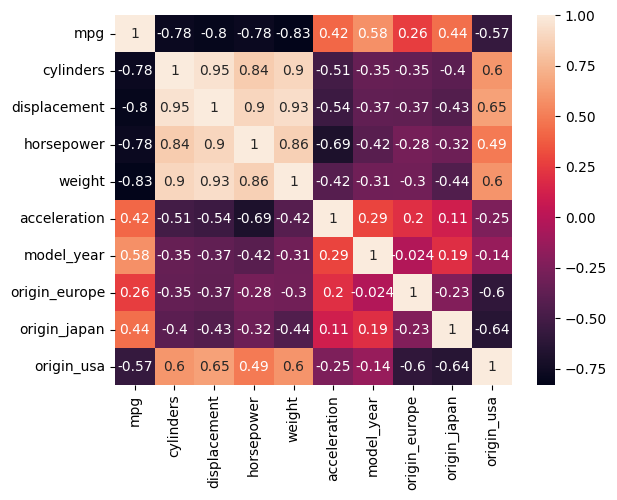

In [7]:
sns.heatmap(mpg_encoded.corr(), annot=True)

Let mpg be the target column and displacement be the feature

---
If we are building a prediction model that predicts the mpg of the car then,  
  
strong correlation with the target:
- weight is stronglly correlated with mpg **(-0.83)** similarly,
- displacement **(-0.8)**
- cylinders **(-0.78)**
- horsepower **(-0.78)**  
indicating that these features might be an important predictors for mpg. 

collinear features:
- cylinders and displacement **(0.95)**
- weight and displacement **(0.93)**
- horsepower and displacement **(0.9)**  

##### Based on the correlation with the target '**mpg**' and among features, **weight** seems better to keep and drop other features (**displacement, cylinders, horsepower**)
---

## Dropping the missing values or rows 

In [8]:

mpg.dropna(subset=['weight', 'mpg'], inplace=True)

In [9]:
X = mpg[['displacement']]
y = mpg['mpg']

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Lasso Regression

In [11]:
from sklearn.linear_model import Lasso

model = Lasso(1.0)

## Linear Regression

In [12]:
model = LinearRegression()  # Initialization

# Model Fit

In [13]:
model.fit(X_train, y_train)

LinearRegression()

In [14]:
y_pred = model.predict(X_test)

Mean Squared Error: 18.102543998358946
R^2 Score: 0.6633114869465596


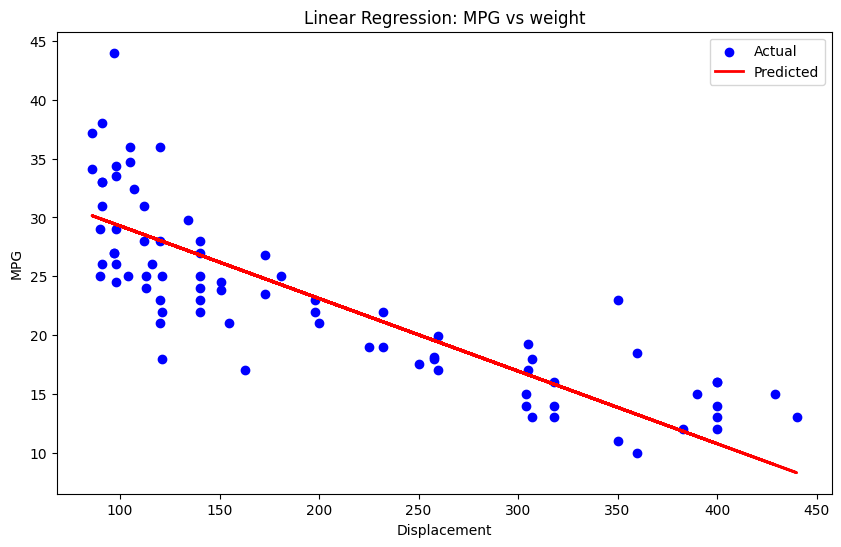

In [16]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt 

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Displacement')
plt.ylabel('MPG')
plt.title('Linear Regression: MPG vs weight')
plt.legend()
plt.show()